<a href="https://colab.research.google.com/github/ariel07-sw/applied-data-in-econ/blob/main/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016': 9.99, 'Price_2024': 11.99}
]

In [ ]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 20.02% Inflation


In [66]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='1701f6e32b9feafc290c551da9f42ac3')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
spotify=fred.get_series('CUSR0000SERA02')
food=fred.get_series('CUSR0000SEFV')
# ... fetch remaining series

In [ ]:
import pandas as pd
df=pd.concat([official_cpi,tuition,rent,spotify,food],axis=1)
df.colomns=['CPI','Tuitiion','Rent','Spotify','Chipotle Burrito']
df.head
df=df.dropna()
df=df.loc['2016-01-01':]

/tmp/ipython-input-4092569231.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colomns=['CPI','Tuitiion','Rent','Spotify','Chipotle Burrito']


In [ ]:

df.tail
df.info

<bound method DataFrame.info of                   0        1        2        3        4
2016-01-01  237.652  699.997  291.700  427.538  259.958
2016-02-01  237.336  701.688  292.617  430.633  260.319
2016-03-01  238.080  703.289  293.471  433.738  260.883
2016-04-01  238.992  704.842  294.397  435.570  261.517
2016-05-01  239.557  706.506  295.371  437.005  262.074
...             ...      ...      ...      ...      ...
2025-07-01  322.132  893.568  436.152  594.484  383.808
2025-08-01  323.364  895.305  437.462  592.604  384.909
2025-09-01  324.368  897.302  438.322  593.928  385.451
2025-11-01  325.031  902.001  438.875  599.226  387.202
2025-12-01  326.030  903.402  440.034  605.825  389.889

[119 rows x 5 columns]>

In [23]:
df.columns=['CPI','Tuition','Rent','Streaming','Food']
base_2016=df.loc['2016-01-01']
df_Index = df.divide(base_2016) * 100

In [25]:
df_Index

,CPI,Tuition,Rent,Streaming,Food
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978
...,...,...,...,...,...
2025-07-01,135.547776,127.653119,149.520740,139.048225,147.642311
2025-08-01,136.066181,127.901262,149.969832,138.608498,148.065841
2025-09-01,136.488647,128.186549,150.264655,138.918178,148.274337
2025-11-01,136.767627,128.857838,150.454234,140.157366,148.947907


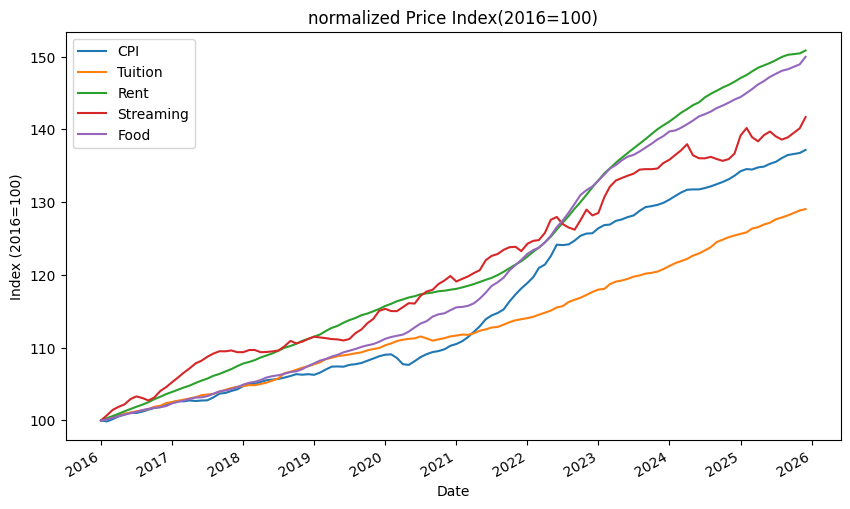

In [28]:
import matplotlib.pyplot as plt
df_Index[['CPI','Tuition','Rent','Streaming','Food']].plot(figsize=(10,6))
plt.title('normalized Price Index(2016=100)')
plt.ylabel('Index (2016=100)')
plt.xlabel('Date')
plt.show()

In [34]:
weights={'CPI':0.10,'Tuition':0.4,'Rent':0.3,'Streaming':0.05,'Food':0.15}

In [36]:
df_Index['Student_SPI']=(weights['Tuition']*df_Index['Tuition']+weights['Rent']*df_Index['Rent']+weights['Food']*df_Index['Food']+weights['Streaming']*df_Index['Streaming']+weights['CPI']*df_Index['CPI'])

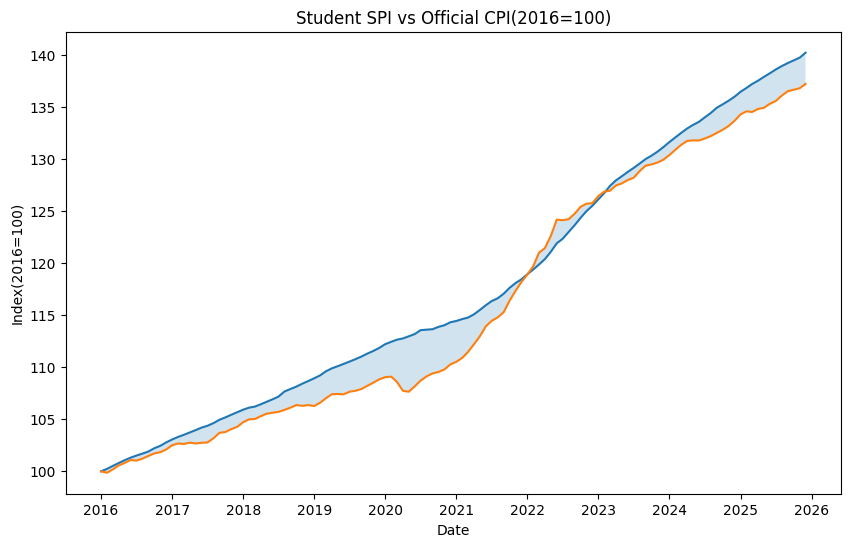

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_Index.index,df_Index['Student_SPI'],label='Student SPI')
plt.plot(df_Index.index,df_Index['CPI'],label='official CPI')
plt.fill_between(
    df_Index.index,df_Index['Student_SPI'],
    df_Index['CPI'],
    alpha=0.2,
    label='Inflation Gap(Student-CPI)'
            )
plt.title('Student SPI vs Official CPI(2016=100)')
plt.xlabel('Date')
plt.ylabel('Index(2016=100)')
plt.legend
plt.show()

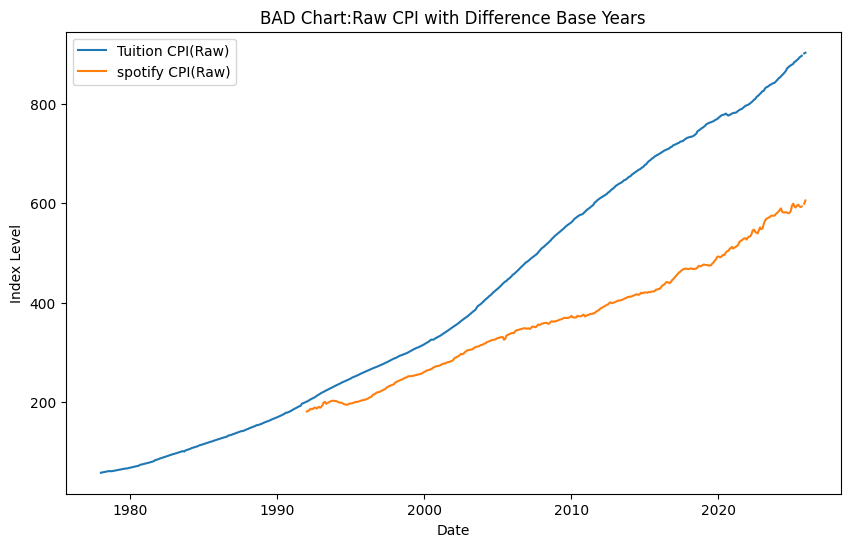

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(tuition.index,tuition,label='Tuition CPI(Raw)')
plt.plot(spotify.index,spotify,label='spotify CPI(Raw)')
plt.title('BAD Chart:Raw CPI with Difference Base Years')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.legend()
plt.show()

Raw CPI series are indexed to different base years, meaning their absolute levels are not comparable. A higher index value does not imply faster inflation, only a different reference point. When plotted together without normalization, categories with older base years (e.g., Tuition) appear artificially large, while others (e.g., Streaming) appear small. This creates a false visual narrative and leads to incorrect economic conclusions. Normalization aligns all series to a common baseline and allows for meaningful comparison of inflation trends.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# 1. 初始化
fred = Fred(api_key='1701f6e32b9feafc290c551da9f42ac3')

# --- 深度清理与列名修复 (针对 KeyError: 'Official_CPI') ---
# 如果 Official_CPI 在索引里，先把它放出来
if 'Official_CPI' not in df.columns:
    df = df.reset_index()

# 强制转换所有列名为字符串，移除所有空格，并统一大小写
df.columns = df.columns.astype(str).str.strip()

# 模糊匹配修复：防止用户输入了类似 "Official_CPI " 或 "official_cpi"
col_map = {col: col for col in df.columns}
for col in df.columns:
    if 'official' in col.lower() and 'cpi' in col.lower():
        df = df.rename(columns={col: 'Official_CPI'})
    if 'student' in col.lower() and 'spi' in col.lower():
        df = df.rename(columns={col: 'Student_SPI'})

# 再次验证，如果还找不到，打印当前所有列名辅助排查
if 'Official_CPI' not in df.columns:
    print("!!! 错误：在 df 中依然找不到 'Official_CPI'。")
    print("目前 df 的列名有:", df.columns.tolist())
    # 这里可以手动强制指定第一列为 Official_CPI (仅作应急)
    # df.rename(columns={df.columns[0]: 'Official_CPI'}, inplace=True)

# 2. 获取波士顿 CPI (FRED Code: CUURA103SA0)
boston_id = 'CUURA103SA0'
boston_series = fred.get_series(boston_id)
boston_df = pd.DataFrame(boston_series, columns=['Boston_CPI'])

# 3. 处理频率与缺失值
boston_df = boston_df.resample('MS').interpolate(method='time')

# 4. 对齐时间戳并合并
# 确保原始 df 的日期列被设为索引
date_col = None
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        date_col = col
        break

if date_col:
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.set_index(date_col)
else:
    # 如果没找到日期列，尝试强转现有的 index
    df.index = pd.to_datetime(df.index)

# 移除旧的 Boston_CPI 防止 join 冲突
if 'Boston_CPI' in df.columns:
    df = df.drop(columns=['Boston_CPI'])

combined_df = df.join(boston_df, how='inner').dropna(subset=['CPI', 'Student_SPI'])

# 5. 重索引 (Normalize): Jan 1, 2016 = 100
base_date = '2016-01-01'
target_dt = pd.to_datetime(base_date)
# 寻找最接近基准日的索引位置
idx_pos = combined_df.index.get_indexer([target_dt], method='nearest')[0]
actual_base_date = combined_df.index[idx_pos]

for col in ['CPI', 'Boston_CPI', 'Student_SPI']:
    denom = combined_df.loc[actual_base_date, col]
    combined_df[f'{col}_Indexed'] = (combined_df[col] / denom) * 100

# 6. 绘图
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['CPI_Indexed'], color='grey', label='National CPI', alpha=0.7)
plt.plot(combined_df.index, combined_df['Boston_CPI_Indexed'], color='blue', label='Boston CPI', linewidth=2)
plt.plot(combined_df.index, combined_df['Student_SPI_Indexed'], color='red', label='Student SPI', linestyle='--')

plt.title(f'Macro Analysis: Regional vs. National (Base: {actual_base_date.date()})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

!!! 错误：在 df 中依然找不到 'Official_CPI'。
目前 df 的列名有: ['level_0', 'index', 'CPI', 'Tuition', 'Rent', 'Streaming', 'Food']


KeyError: ['Student_SPI']